In [1]:
import glob
import json
import pandas as pd

# Define the path to the folder containing our JSON files
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'  # Adjust as needed

# Initialize an empty list to store all the stroke data
all_strokes = []

# Loop through the found files
for file_name in glob.glob(path_to_json):
    print(f"Processing file: {file_name}")  # Print the file name being processed
    with open(file_name, 'r') as file:
        data = json.load(file)
        # Check if the data is in the expected format (i.e if contains 'strokes' key)
        if 'strokes' in data:
            strokes = data['strokes']
            for stroke in strokes:
                stroke['filename'] = file_name  # Add filename to each stroke record
                all_strokes.append(stroke)
        else:
            print(f"Unexpected data format in {file_name}")

# Convert the list of strokes to a DataFrame
df = pd.DataFrame(all_strokes)

# Display the first few rows to understand what the data looks like
print(df.head())

# Analyze the distribution of labels if 'label' is a key in the dictionary
if 'label' in df.columns:
    label_counts = df['label'].value_counts()
    print("Label Distribution:")
    print(label_counts)

# Display total number of examples
print(f"Total number of examples: {len(df)}")

# Save the combined data to a new JSON file
df.to_json('/Users/nely/Desktop/TinyML/Project/combined_gesture_data.json', orient='records')

print("Entries from nelyromo.json:", df[df['filename'].str.contains("nelyromo.json")].shape[0])
print("Entries from nelyromo2.json:", df[df['filename'].str.contains("nelyromo2.json")].shape[0])



Processing file: /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Unexpected data format in /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Processing file: /Users/nely/Desktop/TinyML/Project/linday_50each.json
Processing file: /Users/nely/Desktop/TinyML/Project/linday_50each2.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo2.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo.json
   index                                       strokePoints label  \
0      0  [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0....     0   
1      1  [{'x': -0.0546875, 'y': -0.203125}, {'x': -0.0...     0   
2      2  [{'x': -0.0546875, 'y': -0.2265625}, {'x': -0....     0   
3      3  [{'x': -0.1875, 'y': -0.25}, {'x': -0.1875, 'y...     0   
4      4  [{'x': 0.03125, 'y': -0.171875}, {'x': 0.03125...     0   

                                            filename  
0  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
1  /Users/nely/Desktop/TinyML/Pr

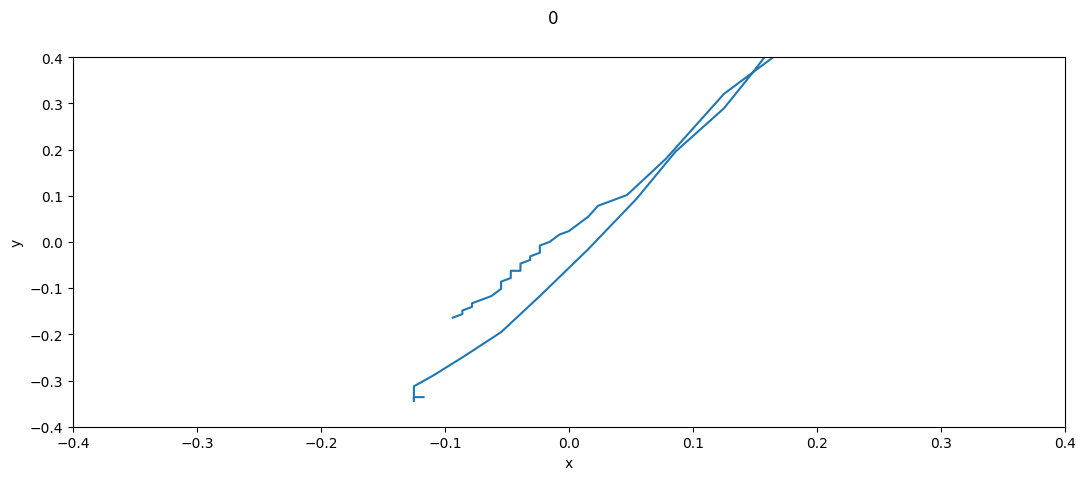

In [2]:
import glob
import json
from pathlib import Path

import matplotlib.pyplot as plt

def plot_stroke(stroke):
    x_array = [coords["x"] for coords in stroke["strokePoints"]]
    y_array = [coords["y"] for coords in stroke["strokePoints"]]

    fig = plt.figure(figsize=(12.8, 4.8))
    fig.suptitle(stroke["label"])

    ax = fig.add_subplot(111)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(-0.4, 0.4)
    ax.plot(x_array, y_array)

    plt.show()

path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
json_files = glob.glob(path_to_json)

strokes = []
for filename in json_files:
    with open(filename, "r") as file:
        file_contents = file.read()
    file_data = json.loads(file_contents)
    for stroke in file_data:
        # Store each stroke along with its filename in a dictionary
        strokes.append({"stroke": stroke, "filename": filename})

# Example usage of plot_stroke function with the first stroke
if strokes:
    plot_stroke(strokes[0]["stroke"])
else:
    print("No strokes found.")


In [3]:
if strokes and len(strokes) > 11:
    print("Stroke content:", strokes[11]["stroke"])
else:
    print("No stroke found or stroke index out of range.")


Stroke content: {'index': 14, 'strokePoints': [{'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.359375}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.34375}, {'x': -0.1328125, 'y': -0.3203125}, {'x': -0.109375, 'y': -0.2734375}, {'x': -0.078125, 'y': -0.1953125}, {'x': -0.046875

In [4]:
# Assuming you have the 'strokes' variable loaded as before
gesture_data = strokes[11]["stroke"]

# Print the type of gesture_data to understand its structure
print(type(gesture_data))

# If it's a dictionary, print its keys
if isinstance(gesture_data, dict):
    print(gesture_data.keys())

# If it's small enough, you can also print the entire content to see the structure
print(gesture_data)


<class 'dict'>
dict_keys(['index', 'strokePoints', 'label', 'filename'])
{'index': 14, 'strokePoints': [{'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.359375}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.34375}, {'x': -0.1328125, 'y': -0.3203125}, {'x': -0.109375, 'y': -0.273

In [5]:
import glob
import json
import pandas as pd
import numpy as np
import PIL.Image
import math
import os
import matplotlib.pyplot as plt

def draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels):
    """Draws a filled circle onto the buffer."""
    for angle in range(360):
        rad = math.radians(angle)
        x = int(center_x + radius * math.cos(rad))
        y = int(center_y + radius * math.sin(rad))
        if 0 <= x < width and 0 <= y < height:
            buffer_index = (y * width + x) * num_channels
            buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
    print("Circle drawn.")


def normalize_points(gesture, width, height, margin_percent=5):
    """Normalize points to be between 0 and 1 based on actual min and max, then scale by image dimensions with margins."""
    print("Normalizing points...")
    if not gesture:
        print("Empty gesture data received.")
        return []

    # Calculate the margin in pixels
    margin_width = width * (margin_percent / 100) / 2
    margin_height = height * (margin_percent / 100) / 2

    all_x = [point['x'] for point in gesture]
    all_y = [point['y'] for point in gesture]
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)

    normalized_gesture = []
    for point in gesture:
        # Normalize points to range from 0 to 1
        normalized_x = (point['x'] - min_x) / (max_x - min_x) if max_x - min_x > 0 else 0.5
        normalized_y = (point['y'] - min_y) / (max_y - min_y) if max_y - min_y > 0 else 0.5
        
        # Apply the margin and scale to the new dimension
        normalized_x = margin_width + normalized_x * (width - 2 * margin_width)
        normalized_y = margin_height + normalized_y * (height - 2 * margin_height)
        
        normalized_gesture.append({"x": normalized_x, "y": normalized_y})
    
    return normalized_gesture



def rasterize_gesture(gesture, label, width, height):
    """Converts a gesture into a rasterized image based on its label."""
    print(f"Rasterizing gesture for label: {label}")
    num_channels = 3
    buffer_byte_count = height * width * num_channels
    buffer = bytearray(buffer_byte_count)
    colors = {
        0: [255, 0, 0],  # Swipe Up
        1: [0, 255, 0],  # Swipe Down
        2: [0, 0, 255],  # Hand Wave
        3: [255, 255, 0],  # Clockwise
        4: [255, 0, 255]  # Counterclockwise
    }
    try:
        label_key = int(label)  # Attempt to convert label to an integer
        color = colors.get(label_key, [255, 255, 255])  # Default to white if no match found
    except ValueError:
        print(f"Warning: Label '{label}' could not be converted to an integer.")
        color = [255, 255, 255]  # Use default white color if conversion fails

    print(f"Using color: {color} for label: {label}")
    gesture = normalize_points(gesture, width, height)

    
    if label in ["clockwise", "counterclockwise"]:
        center_x = width // 2
        center_y = height // 2
        radius = min(width, height) // 4
        draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels)
    else:
        for point_index in range(len(gesture) - 1):
            start_point = gesture[point_index]
            end_point = gesture[point_index + 1]
            start_x, start_y = int(start_point["x"]), int(start_point["y"])
            end_x, end_y = int(end_point["x"]), int(end_point["y"])
            dx = abs(end_x - start_x)
            dy = abs(end_y - start_y)
            sx = 1 if start_x < end_x else -1
            sy = 1 if start_y < end_y else -1
            err = dx - dy
            while start_x != end_x or start_y != end_y:
                if 0 <= start_x < width and 0 <= start_y < height:
                    buffer_index = (start_y * width + start_x) * num_channels
                    buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
                e2 = 2 * err
                if e2 > -dy:
                    err -= dy
                    start_x += sx
                if e2 < dx:
                    err += dx
                    start_y += sy
    
    np_buffer = np.frombuffer(buffer, dtype=np.uint8).reshape(height, width, num_channels)
    return np_buffer

# Load JSON data into DataFrame
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
all_strokes = []
for file_name in glob.glob(path_to_json):
    with open(file_name, 'r') as file:
        data = json.load(file)
        if 'strokes' in data:
            for stroke in data['strokes']:
                stroke['filename'] = file_name
                all_strokes.append(stroke)

df = pd.DataFrame(all_strokes)
print("Data loaded:", df.head())
print(f"Total gestures: {len(df)}")

# Create directory for output images
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Test rasterization on loaded data and save images
for index, row in df.iterrows():
    gesture = row['strokePoints']
    if gesture:
        print("Processing gesture:", gesture)
        label = row['label'].lower()
        file_path = os.path.join(output_dir, f"{label}_{index}.png")
        raster = rasterize_gesture(gesture, label, 64, 64)
        if raster is not None:
            image = PIL.Image.fromarray(raster).resize((512, 512), PIL.Image.NEAREST)
            image.save(file_path)
            print(f"Image saved at {file_path}")
        else:
            print(f"Rasterization of gesture {label} did not return an image.")
    else:
        print(f"No gesture data available for index {index}")


Data loaded:    index                                       strokePoints label  \
0      0  [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0....     0   
1      1  [{'x': -0.0546875, 'y': -0.203125}, {'x': -0.0...     0   
2      2  [{'x': -0.0546875, 'y': -0.2265625}, {'x': -0....     0   
3      3  [{'x': -0.1875, 'y': -0.25}, {'x': -0.1875, 'y...     0   
4      4  [{'x': 0.03125, 'y': -0.171875}, {'x': 0.03125...     0   

                                            filename  
0  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
1  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
2  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
3  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
4  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
Total gestures: 1456
Processing gesture: [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.125, 'y': -

Label: 2


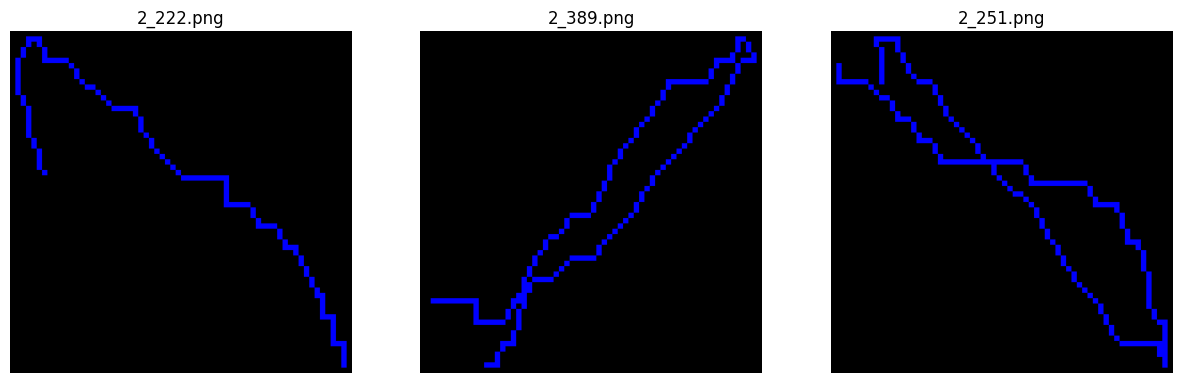

Label: 0


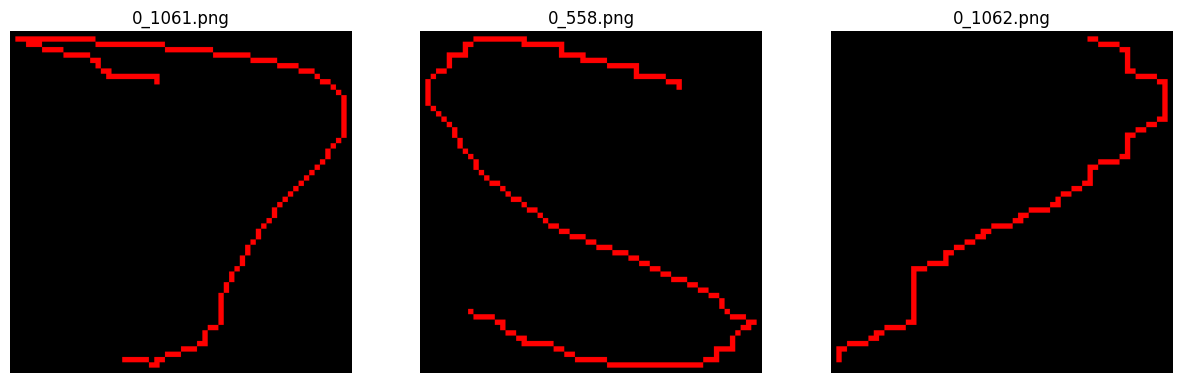

Label: 


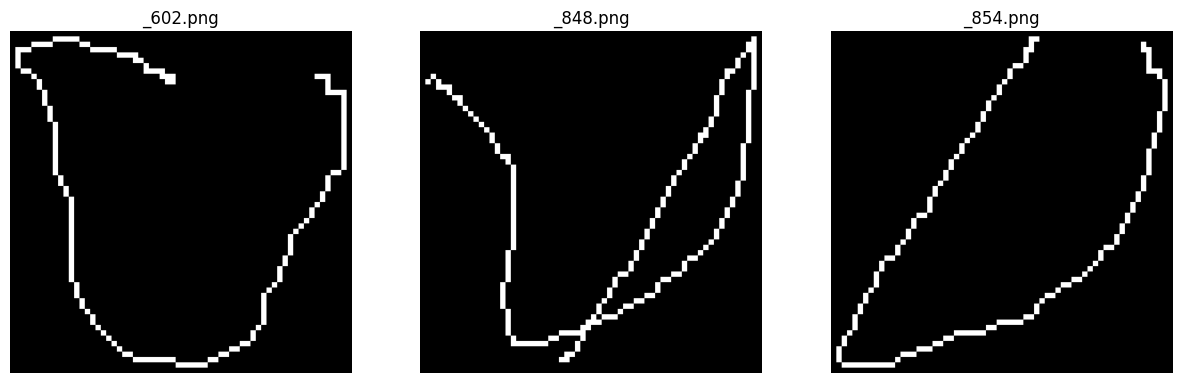

Label: 1


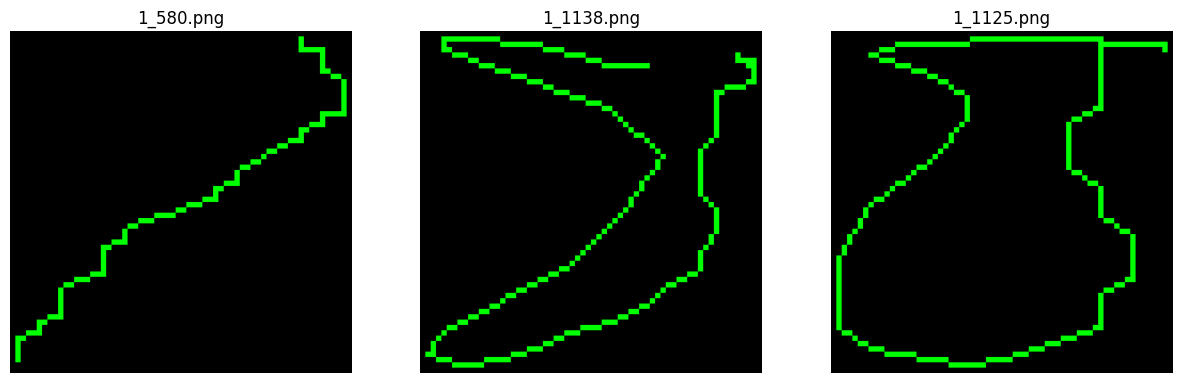

Label: 4


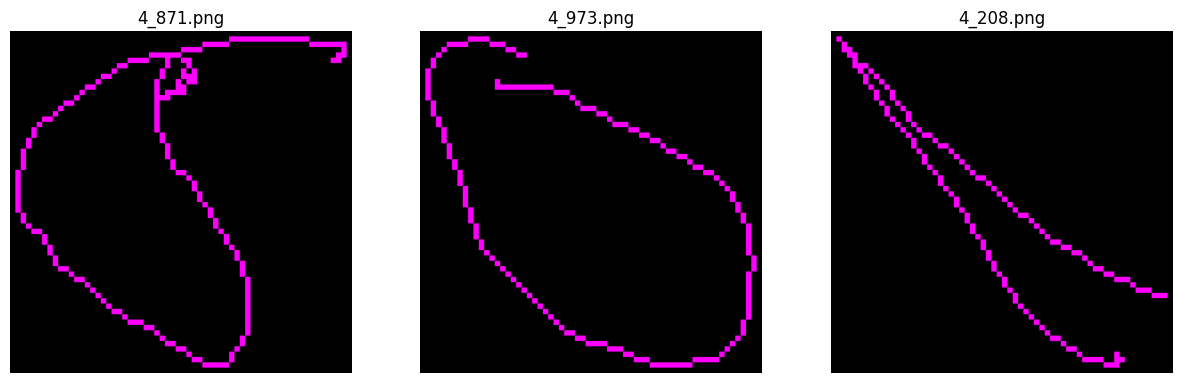

Label: 3


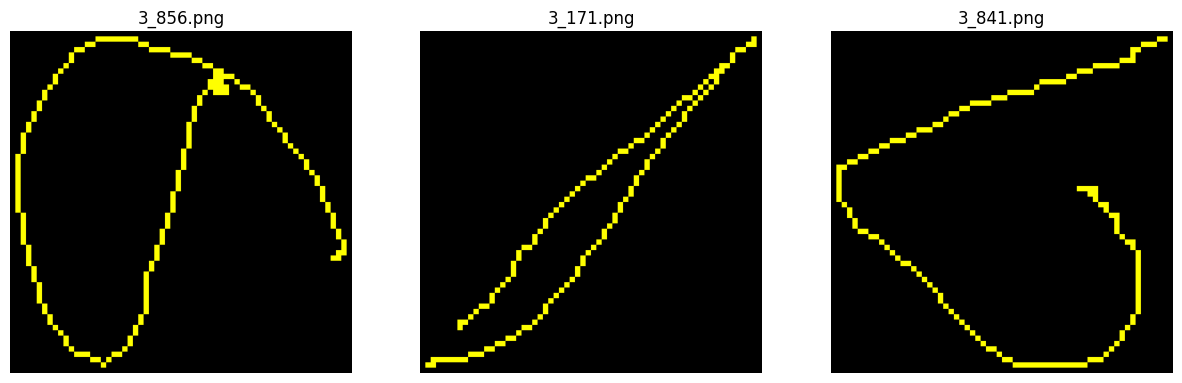

In [6]:
# Loads the image paths from the output directory, groups them by labels, 
# randomly selects only few images from each group to display.

import os
import random
import PIL.Image
import matplotlib.pyplot as plt

def display_sample_images(output_dir, samples_per_label=3):
    # Dictionary to hold image paths categorized by labels
    images_by_label = {}

    # Collect images into the dictionary
    for filename in os.listdir(output_dir):
        if filename.endswith(".png"):
            label = filename.split('_')[0]  # Assuming label is part of the filename before '_'
            if label not in images_by_label:
                images_by_label[label] = []
            images_by_label[label].append(os.path.join(output_dir, filename))

    # Display a sample of images for each label
    for label, paths in images_by_label.items():
        print(f"Label: {label}")
        sample_paths = random.sample(paths, min(samples_per_label, len(paths)))  # Get random samples
        fig, axs = plt.subplots(1, len(sample_paths), figsize=(15, 5))
        for ax, path in zip(axs, sample_paths):
            img = PIL.Image.open(path)
            ax.imshow(img)
            ax.axis('off')  # Hide the axes
            ax.set_title(os.path.basename(path))
        plt.show()

# Example usage
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'
display_sample_images(output_dir)



In [7]:
import os

# Directory where images are stored
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'

# Function to count files
def count_files(directory):
    # List all files in the directory with a specific extension
    files = [file for file in os.listdir(directory) if file.endswith('.png')]
    return len(files)

# Call the function and print the result
num_files = count_files(output_dir)
print(f"There are {num_files} rasterized gesture images in the directory.")


There are 1978 rasterized gesture images in the directory.


In [4]:
import glob
import json
import pandas as pd
import numpy as np
import PIL.Image
import math
import os
import matplotlib.pyplot as plt

def draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels):
    """Draws a filled circle onto the buffer."""
    for angle in range(360):
        rad = math.radians(angle)
        x = int(center_x + radius * math.cos(rad))
        y = int(center_y + radius * math.sin(rad))
        if 0 <= x < width and 0 <= y < height:
            buffer_index = (y * width + x) * num_channels
            buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
    print("Circle drawn.")

def normalize_points(gesture, width, height, margin_percent=5):
    """Normalize points to be between 0 and 1 based on actual min and max, then scale by image dimensions with margins."""
    print("Normalizing points...")
    if not gesture:
        print("Empty gesture data received.")
        return []

    margin_width = width * (margin_percent / 100) / 2
    margin_height = height * (margin_percent / 100) / 2

    all_x = [point['x'] for point in gesture]
    all_y = [point['y'] for point in gesture]
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)

    normalized_gesture = []
    for point in gesture:
        normalized_x = (point['x'] - min_x) / (max_x - min_x) if max_x - min_x > 0 else 0.5
        normalized_y = (point['y'] - min_y) / (max_y - min_y) if max_y - min_y > 0 else 0.5
        normalized_x = margin_width + normalized_x * (width - 2 * margin_width)
        normalized_y = margin_height + normalized_y * (height - 2 * margin_height)
        normalized_gesture.append({"x": normalized_x, "y": normalized_y})
    
    return normalized_gesture


def rasterize_gesture(gesture, label, width, height):
    """Converts a gesture into a rasterized image based on its label."""
    print(f"Rasterizing gesture for label: {label}")
    num_channels = 3
    buffer_byte_count = height * width * num_channels
    buffer = bytearray(buffer_byte_count)
    colors = {
        0: [255, 0, 0],  # Swipe Up
        1: [0, 255, 0],  # Swipe Down
        2: [0, 0, 255],  # Hand Wave
        3: [255, 255, 0],  # Clockwise
        4: [255, 0, 255]  # Counterclockwise
    }
    try:
        label_key = int(label)  # Attempt to convert label to an integer
        color = colors.get(label_key, [255, 255, 255])  # Default to white if no match found
    except ValueError:
        print(f"Warning: Label '{label}' could not be converted to an integer.")
        color = [255, 255, 255]  # Use default white color if conversion fails

    print(f"Using color: {color} for label: {label}")
    gesture = normalize_points(gesture, width, height)

    if label in ["clockwise", "counterclockwise"]:
        center_x = width // 2
        center_y = height // 2
        radius = min(width, height) // 4
        draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels)
    else:
        for point_index in range(len(gesture) - 1):
            start_point = gesture[point_index]
            end_point = gesture[point_index + 1]
            start_x, start_y = int(start_point["x"]), int(start_point["y"])
            end_x, end_y = int(end_point["x"]), int(end_point["y"])
            dx = abs(end_x - start_x)
            dy = abs(end_y - start_y)
            sx = 1 if start_x < end_x else -1
            sy = 1 if start_y < end_y else -1
            err = dx - dy
            while start_x != end_x or start_y != end_y:
                if 0 <= start_x < width and 0 <= start_y < height:
                    buffer_index = (start_y * width + start_x) * num_channels
                    buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
                e2 = 2 * err
                if e2 > -dy:
                    err -= dy
                    start_x += sx
                if e2 < dx:
                    err += dx
                    start_y += sy
    
    np_buffer = np.frombuffer(buffer, dtype=np.uint8).reshape(height, width, num_channels)
    return np_buffer




def ensure_empty_dir(dirname):
    """Ensures the specified directory is empty by deleting and recreating it."""
    dirpath = Path(dirname)
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath.mkdir()


In [5]:
# Load JSON data into DataFrame
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
all_strokes = []
for file_name in glob.glob(path_to_json):
    with open(file_name, 'r') as file:
        data = json.load(file)
        if 'strokes' in data:
            for stroke in data['strokes']:
                stroke['filename'] = file_name
                all_strokes.append(stroke)

augmented_dir = '/Users/nely/Desktop/TinyML/Project/Augmented'
rasterized_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'
ensure_empty_dir(augmented_dir)
ensure_empty_dir(rasterized_dir)

# Process each gesture
for index, stroke in enumerate(all_strokes):
    gesture = stroke['strokePoints']
    label = stroke['label'].lower()

    # Augment gesture
    augmented_gestures = [augment_points(gesture, 0.1, 0.1, 0.1) for _ in range(3)]  # Augment three times

    for i, aug_gesture in enumerate(augmented_gestures):
        # Normalize augmented gesture
        normalized_gesture = normalize_points(aug_gesture, 64, 64)

        # Rasterize the normalized, augmented gestures
        raster = rasterize_gesture(normalized_gesture, label, 64, 64)

        # Save augmented data
        augmented_file_path = os.path.join(augmented_dir, f"{label}_{index}_aug{i}.json")
        with open(augmented_file_path, 'w') as f:
            json.dump(aug_gesture, f)

        # Save rasterized image
        rasterized_file_path = os.path.join(rasterized_dir, f"{label}_{index}_aug{i}.png")
        image = PIL.Image.fromarray(raster)
        image.save(rasterized_file_path)
        print(f"Rasterized augmented image saved at {rasterized_file_path}")


Normalizing points...
Rasterizing gesture for label: 0
Using color: [255, 0, 0] for label: 0
Normalizing points...
Rasterized augmented image saved at /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/0_0_aug0.png
Normalizing points...
Rasterizing gesture for label: 0
Using color: [255, 0, 0] for label: 0
Normalizing points...
Rasterized augmented image saved at /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/0_0_aug1.png
Normalizing points...
Rasterizing gesture for label: 0
Using color: [255, 0, 0] for label: 0
Normalizing points...
Rasterized augmented image saved at /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/0_0_aug2.png
Normalizing points...
Rasterizing gesture for label: 0
Using color: [255, 0, 0] for label: 0
Normalizing points...
Rasterized augmented image saved at /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/0_1_aug0.png
Normalizing points...
Rasterizing gesture for label: 0
Using color: [255, 0, 0] for label: 0
Normalizing

Augmented Data for 3_155_aug0.json: [{'x': -0.35646695687584995, 'y': -0.22303530856860776}, {'x': -0.35646695687584995, 'y': -0.22303530856860776}, {'x': -0.35646695687584995, 'y': -0.22303530856860776}, {'x': -0.35646695687584995, 'y': -0.22303530856860776}, {'x': -0.34857128617452104, 'y': -0.22228952220678552}]
Augmented Data for 0_581_aug2.json: [{'x': -0.2590529668668584, 'y': -0.11147831544625703}, {'x': -0.2590529668668584, 'y': -0.11147831544625703}, {'x': -0.2596027798104156, 'y': -0.10294124099628378}, {'x': -0.2596027798104156, 'y': -0.10294124099628378}, {'x': -0.2596027798104156, 'y': -0.10294124099628378}]
Augmented Data for _589_aug0.json: [{'x': 0.014528774166858799, 'y': 0.2590445839524833}, {'x': 0.01415894357360099, 'y': 0.251897619357432}, {'x': 0.01415894357360099, 'y': 0.251897619357432}, {'x': 0.01415894357360099, 'y': 0.251897619357432}, {'x': 0.01415894357360099, 'y': 0.251897619357432}]
Label: 


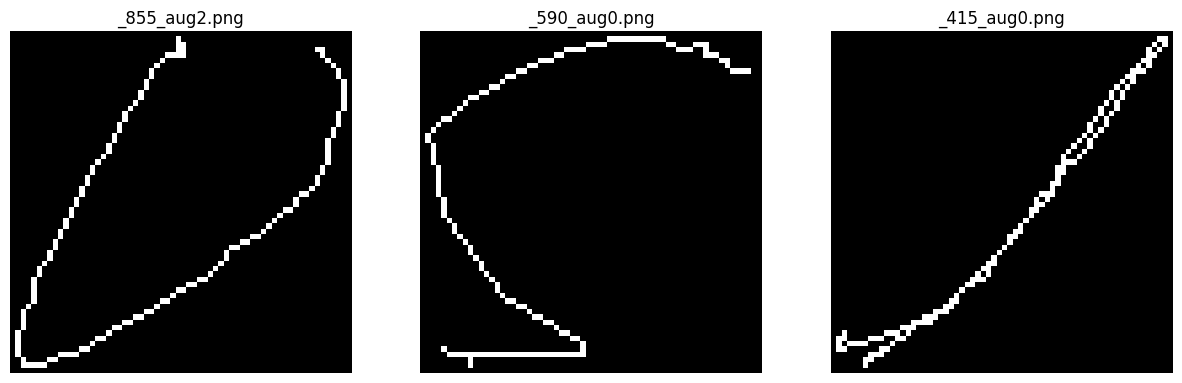

Label: 1


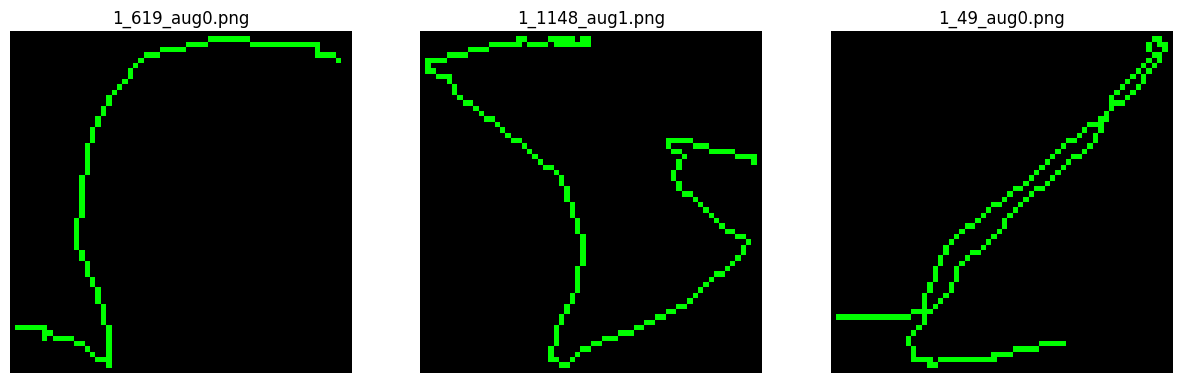

Label: 2


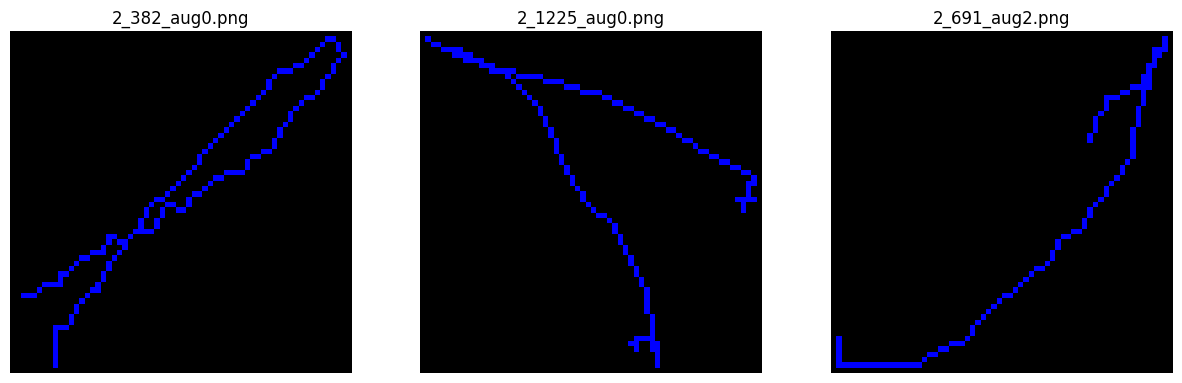

Label: 4


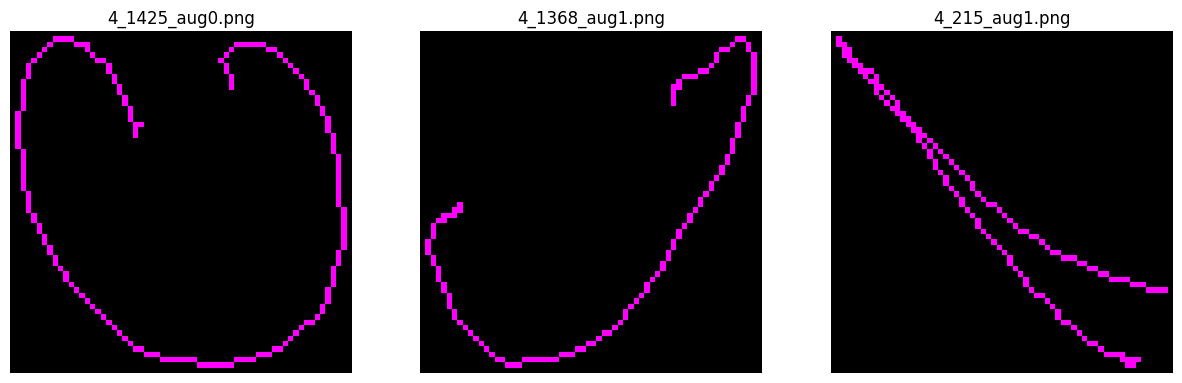

Label: 3


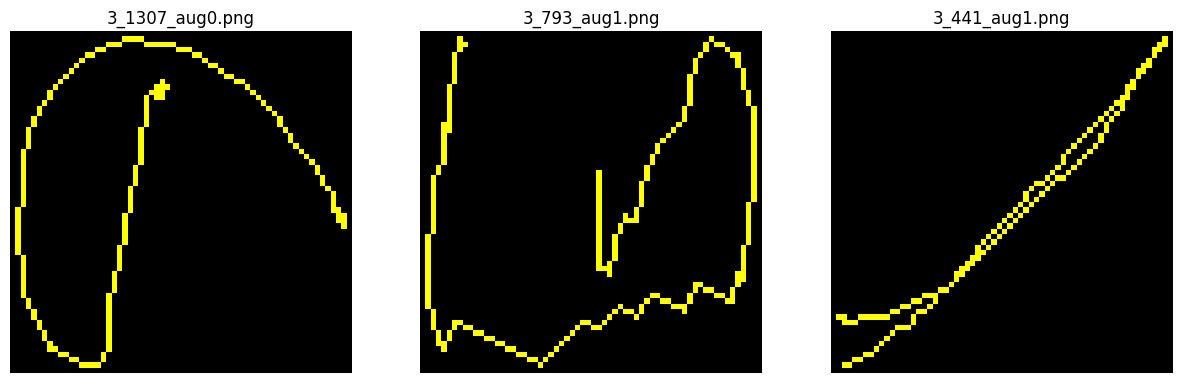

Label: 0


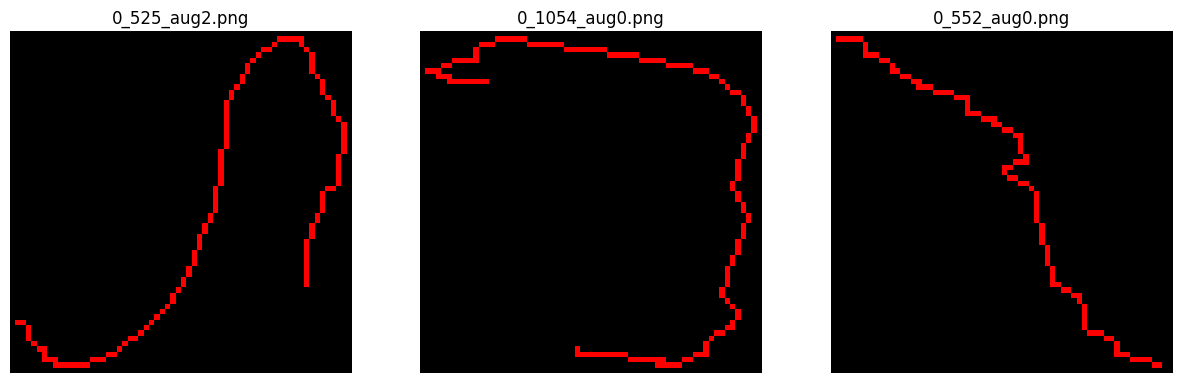

In [6]:
# To print augmented coordinates
# To display augmented and rasterized images

import os
import random
import json
import PIL.Image
import matplotlib.pyplot as plt

def print_augmented_data(augmented_dir, samples_per_label=3):
    # Print augmented data points for a few samples
    augmented_files = [f for f in os.listdir(augmented_dir) if f.endswith('.json')]
    sample_files = random.sample(augmented_files, min(samples_per_label, len(augmented_files)))
    
    for filename in sample_files:
        filepath = os.path.join(augmented_dir, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
            print(f"Augmented Data for {filename}: {data[:5]}")  # Print only first 5 points 

def display_sample_images(output_dir, samples_per_label=3):
    # Dictionary to hold image paths categorized by labels
    images_by_label = {}

    # Collect images into the dictionary
    for filename in os.listdir(output_dir):
        if filename.endswith(".png"):
            label = filename.split('_')[0]  # Assuming label is part of the filename before '_'
            if label not in images_by_label:
                images_by_label[label] = []
            images_by_label[label].append(os.path.join(output_dir, filename))

    # Display a sample of images for each label
    for label, paths in images_by_label.items():
        print(f"Label: {label}")
        sample_paths = random.sample(paths, min(samples_per_label, len(paths)))  # Get random samples
        fig, axs = plt.subplots(1, len(sample_paths), figsize=(15, 5))
        for ax, path in zip(axs, sample_paths):
            img = PIL.Image.open(path)
            ax.imshow(img)
            ax.axis('off')  # Hide the axes
            ax.set_title(os.path.basename(path))
        plt.show()

# Example usage
augmented_dir = '/Users/nely/Desktop/TinyML/Project/Augmented'
rasterized_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'

print_augmented_data(augmented_dir, 3)  # adjust number of samples if needed
display_sample_images(rasterized_dir, 3)  # adjust number of samples if needed


In [11]:
# to compare original coordinates and the augmented ones 

import os
import json
import glob
import pandas as pd

def compare_data(original_data, augmented_dir, sample_ids):
    # Compare original data points with augmented data points
    for sample_id in sample_ids:
        # Find original data corresponding to the sample ID
        original = [stroke for stroke in original_data if stroke['filename'].endswith(f"{sample_id.split('_')[0]}.json")]
        if original:
            original_points = original[0]['strokePoints'][:5]
            print(f"Original Data for {original[0]['filename']}: {original_points}")

        # Construct the augmented file path with the correct naming
        augmented_path = os.path.join(augmented_dir, f"_{sample_id}.json")
        print(f"Attempting to open: {augmented_path}")  # Log the exact path being opened
        try:
            with open(augmented_path, 'r') as f:
                augmented_points = json.load(f)
                print(f"Augmented Data for {sample_id}: {augmented_points[:5]}")
        except FileNotFoundError:
            print(f"File not found: {augmented_path}")
            continue

# Load JSON data into DataFrame
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
all_strokes = []
for file_name in glob.glob(path_to_json):
    with open(file_name, 'r') as file:
        data = json.load(file)
        if 'strokes' in data:
            for stroke in data['strokes']:
                stroke['filename'] = file_name
                all_strokes.append(stroke)

# Specify IDs based on files we want to compare
sample_ids = ['50_aug0', '51_aug2', '52_aug1']
augmented_dir = '/Users/nely/Desktop/TinyML/Project/Augmented'
compare_data(all_strokes, augmented_dir, sample_ids)



Attempting to open: /Users/nely/Desktop/TinyML/Project/Augmented/_50_aug0.json
Augmented Data for 50_aug0: [{'x': -0.2088623774248322, 'y': 0.2690819218613193}, {'x': -0.2088623774248322, 'y': 0.2690819218613193}, {'x': -0.20097125797119336, 'y': 0.2696724457539723}, {'x': -0.20038073407854023, 'y': 0.26178132630033346}, {'x': -0.20038073407854023, 'y': 0.26178132630033346}]
Attempting to open: /Users/nely/Desktop/TinyML/Project/Augmented/_51_aug2.json
Augmented Data for 51_aug2: [{'x': -0.06367995099041754, 'y': 0.1665906911760509}, {'x': -0.05513125974345629, 'y': 0.16574912787059135}, {'x': -0.05513125974345629, 'y': 0.16574912787059135}, {'x': -0.05513125974345629, 'y': 0.16574912787059135}, {'x': -0.046582568496495044, 'y': 0.16490756456513178}]
Attempting to open: /Users/nely/Desktop/TinyML/Project/Augmented/_52_aug1.json
Augmented Data for 52_aug1: [{'x': -0.007356123770899614, 'y': 0.23320030584828869}, {'x': -0.007356123770899614, 'y': 0.23320030584828869}, {'x': 0.00046725114

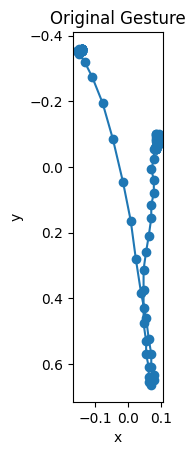

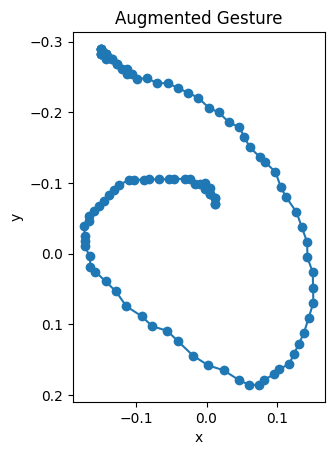

In [10]:
# to compare original data in cordinates with augmented cordinates plotted (plots below ARE NOT for the same instance)
import json
import matplotlib.pyplot as plt
import glob

def plot_gesture(points, title):
    """Plot a single gesture based on x, y coordinates."""
    x = [point['x'] for point in points]
    y = [point['y'] for point in points]
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().invert_yaxis()  # Invert y axis to match common graphical coordinates
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal scaling
    plt.show()

# Load original data
original_file = '/Users/nely/Desktop/TinyML/Project/combined_gesture_data.json'
with open(original_file, 'r') as file:
    original_data = json.load(file)

# Filter the original data to find a gesture with a specific index, example index 14
original_gesture = next((gesture for gesture in original_data if gesture['index'] == 14), None)

# If found, plot the original gesture
if original_gesture:
    plot_gesture(original_gesture['strokePoints'], 'Original Gesture')
else:
    print("Original gesture not found.")

# Path to the augmented data directory
augmented_dir = '/Users/nely/Desktop/TinyML/Project/Augmented'
augmented_files = glob.glob(f"{augmented_dir}/*.json")

# Example to plot an augmented file
augmented_file = augmented_files[0]  # Assuming we plot the first file
with open(augmented_file, 'r') as file:
    augmented_data = json.load(file)

# Plot the augmented data
plot_gesture(augmented_data, 'Augmented Gesture')



In [1]:
# Splitting training and testing data sets
# using ONLY those WITH labels. Thsoe files that start with no number that means they do not have label!

import os
import glob
import numpy as np
import math

def save_data_list(data_list, directory, prefix):
    """Save a list of file paths to a text file."""
    with open(os.path.join(directory, f'{prefix}_files.txt'), 'w') as file:
        for item in data_list:
            file.write(f"{item}\n")

# Directory containing augmented and rasterized gesture data
data_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'
# Load all .png files
data_files = glob.glob(f"{data_dir}/*.png")

# Filter out files without a label (unlabeled files start with an underscore)
labeled_files = [file for file in data_files if not os.path.basename(file).startswith('_')]

# Shuffle the files to ensure randomness in data split
np.random.shuffle(labeled_files)

# Define split percentages
test_percentage = 10
validation_percentage = 10
train_percentage = 80  # This should sum to 100%

# Calculate the number of items for each dataset
test_count = math.floor((len(labeled_files) * test_percentage) / 100)
validation_count = math.floor((len(labeled_files) * validation_percentage) / 100)

# Split the data
test_files = labeled_files[:test_count]
validation_files = labeled_files[test_count:(test_count + validation_count)]
train_files = labeled_files[(test_count + validation_count):]

# Save lists of file paths
save_data_list(test_files, data_dir, "test")
save_data_list(validation_files, data_dir, "validation")
save_data_list(train_files, data_dir, "train")

# Print counts to verify the splits
print(f"Total labeled files: {len(labeled_files)}")
print(f"Training files: {len(train_files)} ({train_percentage}%)")
print(f"Validation files: {len(validation_files)} ({validation_percentage}%)")
print(f"Test files: {len(test_files)} ({test_percentage}%)")




Total labeled files: 3951
Training files: 3161 (80%)
Validation files: 395 (10%)
Test files: 395 (10%)


In [7]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Constants
data_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'
image_size = (32, 32)
batch_size = 32

# Create a single ImageDataGenerator instance to rescale images
datagen = ImageDataGenerator(rescale=1./255)

# Load image paths and labels from the text file for the test data
df_test = pd.read_csv(data_dir + '/test_files.txt', header=None, names=['filename'])

# Extract labels from the filenames
df_test['label'] = df_test['filename'].apply(lambda x: x.split('/')[-1].split('_')[0])

# Convert labels to strings for categorical mode
df_test['label'] = df_test['label'].astype(str)

# Setup the generator for test data using the DataFrame
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=None,  # No directory path needed as full paths are given in the DataFrame
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # Important not to shuffle test data to have consistent evaluation
)

# Load image paths for the training data
df_train = pd.read_csv(data_dir + '/train_files.txt', header=None, names=['filename'])

# Extract labels from the filenames
df_train['label'] = df_train['filename'].apply(lambda x: x.split('/')[-1].split('_')[0])

# Convert labels to strings for categorical mode
df_train['label'] = df_train['label'].astype(str)

# Setup the generator for training data using the DataFrame
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,  # No directory path needed as full paths are given in the DataFrame
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True  # Shuffle training data for better training
)

# Load image paths for the validation data
df_validation = pd.read_csv(data_dir + '/validation_files.txt', header=None, names=['filename'])

# Extract labels from the filenames
df_validation['label'] = df_validation['filename'].apply(lambda x: x.split('/')[-1].split('_')[0])

# Convert labels to strings for categorical mode
df_validation['label'] = df_validation['label'].astype(str)

# Setup the generator for validation data using the DataFrame
validation_generator = datagen.flow_from_dataframe(
    dataframe=df_validation,
    directory=None,  # No directory path needed as full paths are given in the DataFrame
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # No need to shuffle validation data
)


Found 395 validated image filenames belonging to 5 classes.
Found 3161 validated image filenames belonging to 5 classes.
Found 395 validated image filenames belonging to 5 classes.


Label distribution for Training Data:
label
4    727
1    649
3    628
0    610
2    547
Name: count, dtype: int64



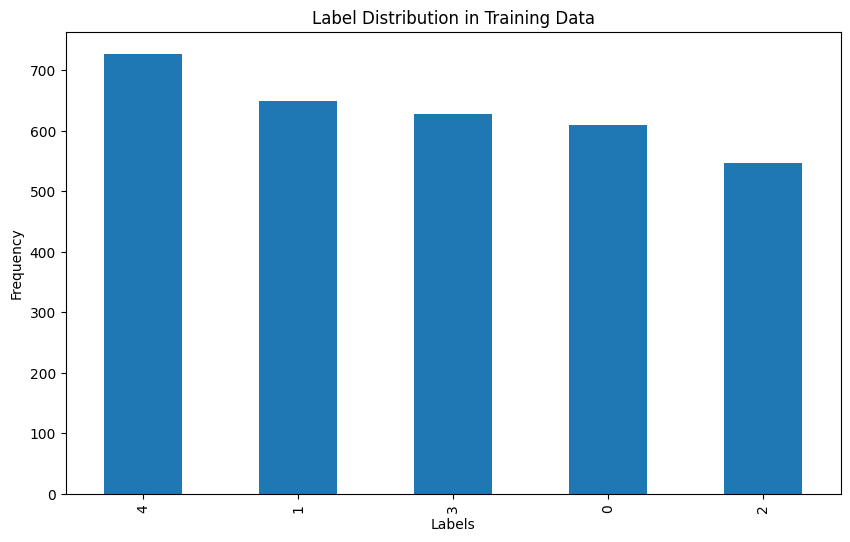

Label distribution for Validation Data:
label
4    96
1    87
0    73
3    72
2    67
Name: count, dtype: int64



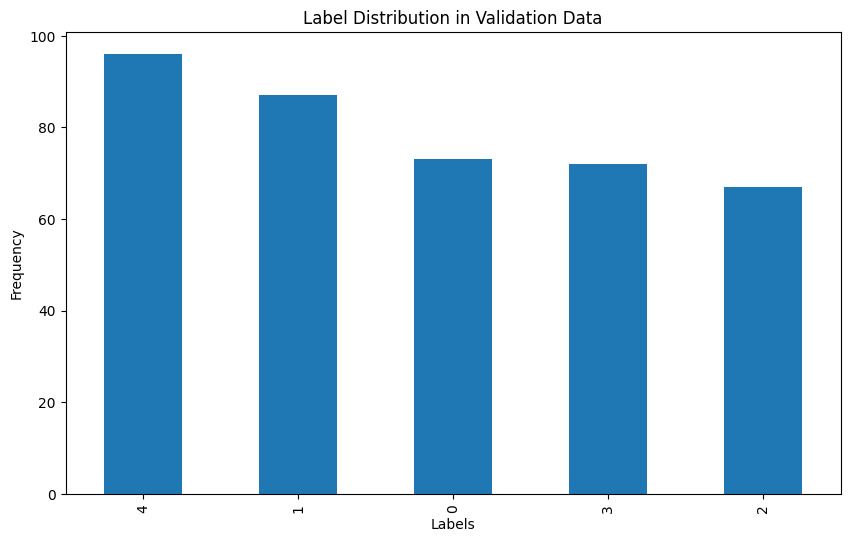

Label distribution for Test Data:
label
4    89
0    88
1    86
3    71
2    61
Name: count, dtype: int64



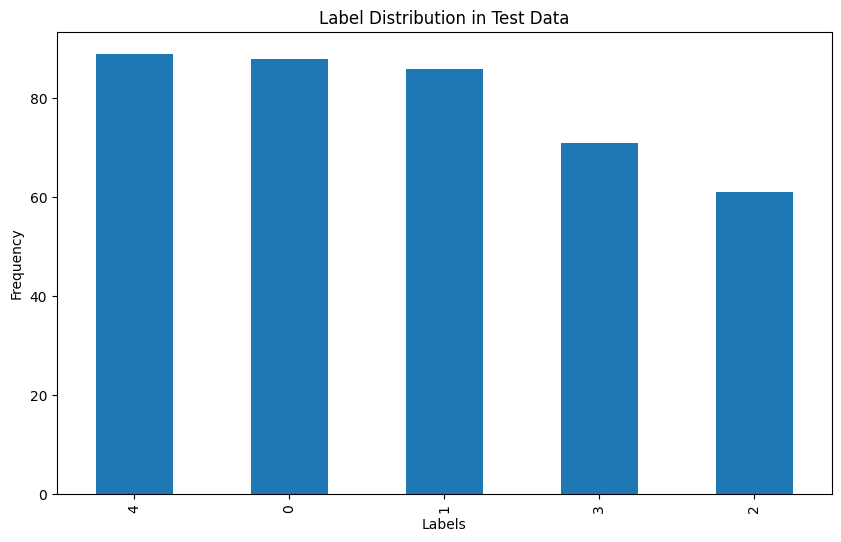

In [10]:
# To inspect diversity in subsets (training, validation and tetsing)

import matplotlib.pyplot as plt

# Define a function to plot label distribution
def plot_label_distribution(df, title):
    label_counts = df['label'].value_counts()
    print(f"Label distribution for {title}:\n{label_counts}\n")
    
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar')
    plt.title(f'Label Distribution in {title}')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.show()

# Print and plot label distribution for training, validation, and test data
plot_label_distribution(df_train, 'Training Data')
plot_label_distribution(df_validation, 'Validation Data')
plot_label_distribution(df_test, 'Test Data')


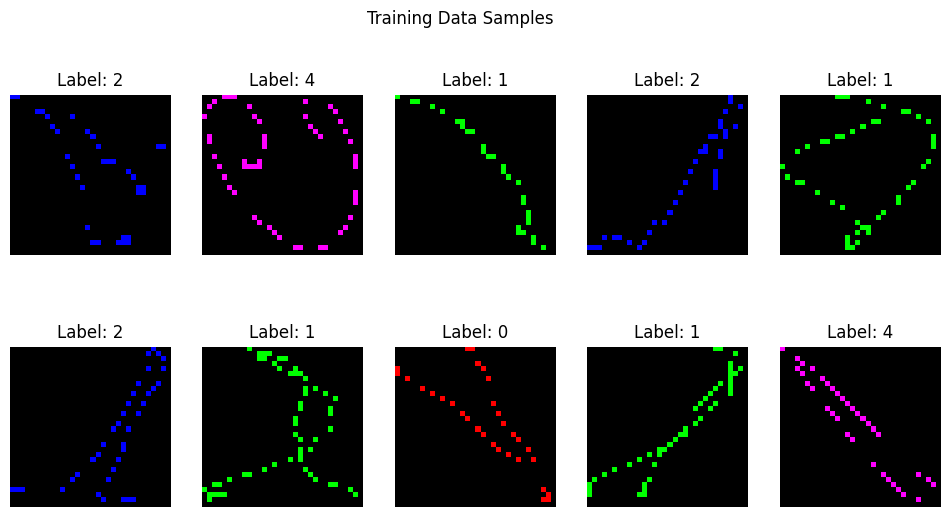

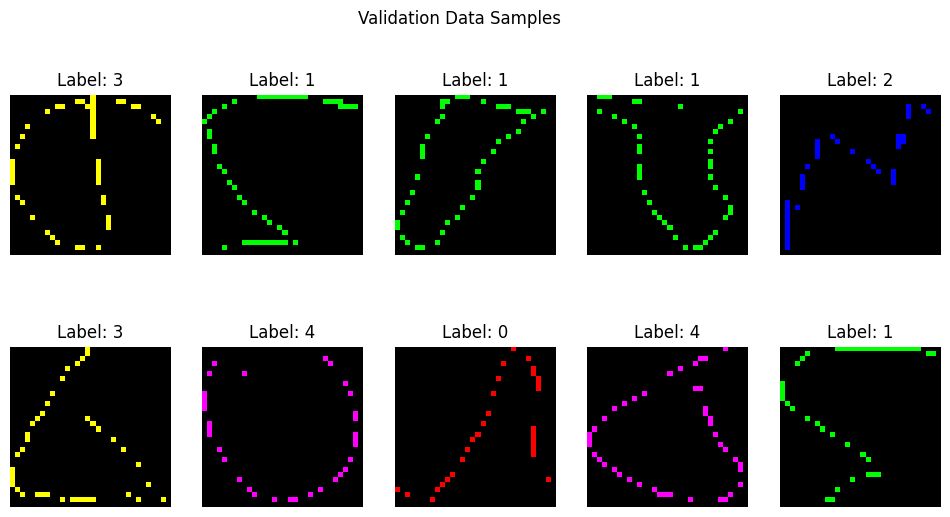

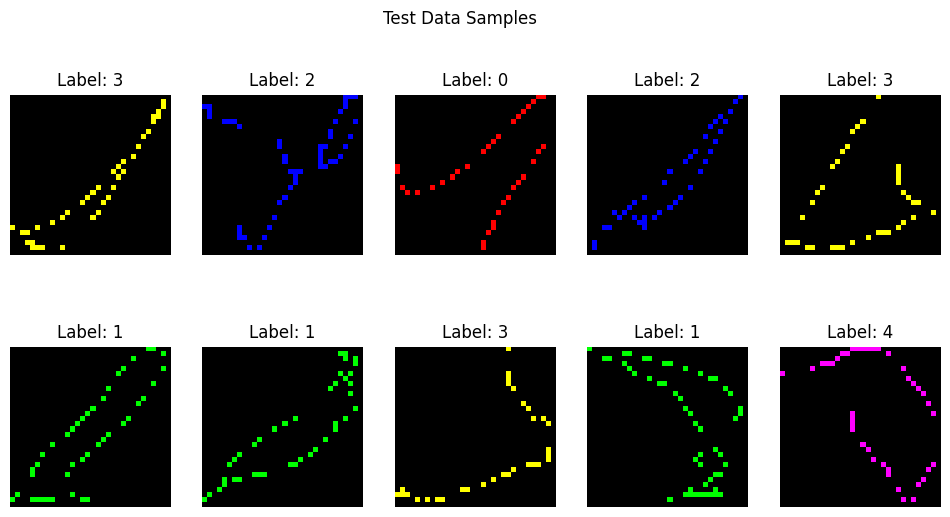

In [16]:
# To visually inspect images. Ensuirng training and Testing subsets are enough different to avoid having too easy training later

import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(generator, title):
    plt.figure(figsize=(12, 6))
    for i in range(10):  # Display 10 images from the generator
        x, y = generator.next()
        plt.subplot(2, 5, i+1)
        plt.imshow(x[0])
        plt.title(f"Label: {np.argmax(y[0])}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Show samples from each dataset
show_sample_images(train_generator, "Training Data Samples")
show_sample_images(validation_generator, "Validation Data Samples")
show_sample_images(test_generator, "Test Data Samples")


In [8]:
# Option 2 (this option is with 50 epochs)

from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.callbacks import Callback
import time

# Constants
data_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'
image_size = (32, 32)  # Assuming this is the size of rasterized images
num_classes = 5  # Five gestures
batch_size = 32  # Modify as computational resource permits


# CNN Architecture adapted to our project.
# I used this architecture in Lab.6
def make_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # First Conv Block
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Second Conv Block
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Third Conv Block
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Final Layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    return Model(inputs, outputs)

class TimingCallback(Callback):
    def __init__(self):
        self.times = []
        self.total_time = time.time()
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)
        print(f"Epoch {epoch+1}: {self.times[-1]:.2f} seconds")
    
    def on_train_end(self, logs=None):
        print(f"Total training time: {(time.time() - self.total_time):.2f} seconds")

# Instantiate the timing callback
timing_callback = TimingCallback()

# Model instantiation and summary
model = make_model((32, 32, 3), num_classes)
model.summary()

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with the timing callback
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=[timing_callback]
)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [9]:
# To save training history and print training and validation accuracies

from keras.models import Model, save_model, load_model
from keras.callbacks import Callback, ModelCheckpoint
import time
import json

# Define a callback to save the training history
class HistorySaver(Callback):
    def __init__(self, file_path):
        self.file_path = file_path

    def on_train_begin(self, logs=None):
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        with open(self.file_path, 'w') as file:
            json.dump(self.history, file)

# Define a callback to print training and validation accuracy
class AccuracyPrinter(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1} - Training Accuracy: {logs['accuracy']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")

# Constants
data_dir = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized'
image_size = (32, 32)  # Assuming this is the size of our rasterized images
num_classes = 5  # Five gestures
batch_size = 32  # Modify as needed

# Instantiate the timing callback
timing_callback = TimingCallback()

# Instantiate the history saver callback
history_saver = HistorySaver('training_history.json')

# Instantiate the accuracy printer callback
accuracy_printer = AccuracyPrinter()

# Model instantiation and summary
model = make_model((32, 32, 3), num_classes)
model.summary()

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a callback to save the model checkpoints
checkpoint_path = "model_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Training the model with the timing callback and saving history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=[timing_callback, history_saver, checkpoint_callback, accuracy_printer]
)

# Print testing accuracy
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Save the final model
save_model(model, 'final_model.h5')


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0   

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


98/98 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000Epoch 2: 1.77 seconds

Epoch 2: val_loss improved from 1.94846 to 1.82600, saving model to model_checkpoint.h5
Epoch 2 - Training Accuracy: 1.0000 - Validation Accuracy: 0.3464
98/98 [==============================] - 2s 18ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.8260 - val_accuracy: 0.3464
Epoch 3/50
98/98 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000Epoch 3: 1.60 seconds

Epoch 3: val_loss improved from 1.82600 to 1.04461, saving model to model_checkpoint.h5
Epoch 3 - Training Accuracy: 1.0000 - Validation Accuracy: 0.5339
98/98 [==============================] - 2s 16ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.0446 - val_accuracy: 0.5339
Epoch 4/50
97/98 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9997Epoch 4: 1.57 seconds

Epoch 4: val_loss improved from 1.04461 to 0.14617, saving model to model_checkpoint.h5
Epoch 4

/var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/ipykernel_78796/2208747870.py:66: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'final_model.h5')


13/13 [==============================] - 0s 8ms/step


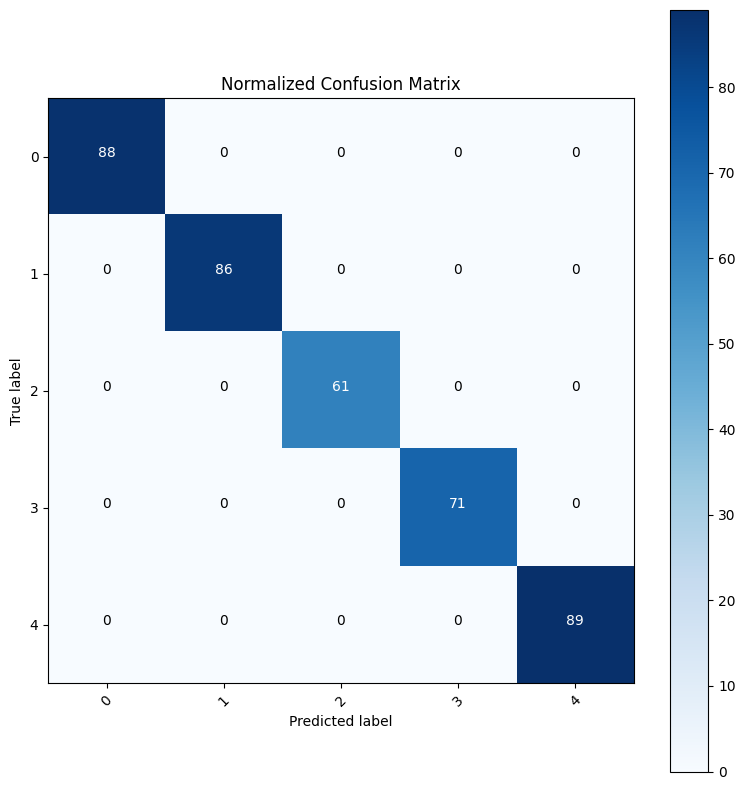

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        89

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395



In [14]:
# To print more comprehensive evaluation metrics 

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    # Correct the indices unpacking here
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Predict the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Actual labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm, classes=test_generator.class_indices.keys(), title='Normalized Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))



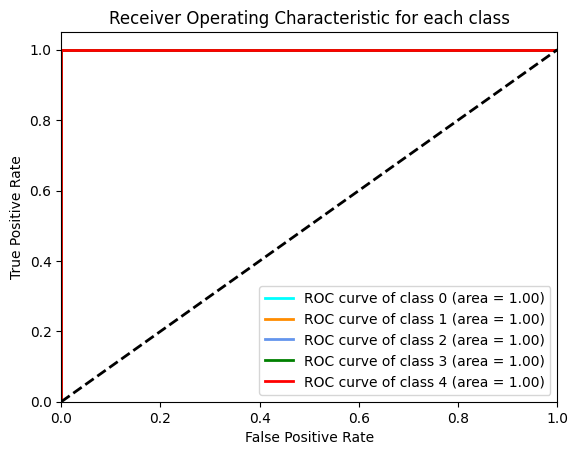

In [15]:
# To calculate ROC (used when unbalanced data). Just in case.
# Convert true labels to binary format for each class

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_true_binary = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    if np.any(y_true_binary[:, i]):
        fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        fpr[i], tpr[i], roc_auc[i] = [None], [None], None

# Plot all ROC curves if applicable
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    if fpr[i] is not None and tpr[i] is not None:
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    else:
        print(f"No positive samples for class {i}, skipping ROC curve.")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()


/var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/ipykernel_95242/671469961.py:54: RuntimeWarning: invalid value encountered in divide
  cam = cam / cam.max()


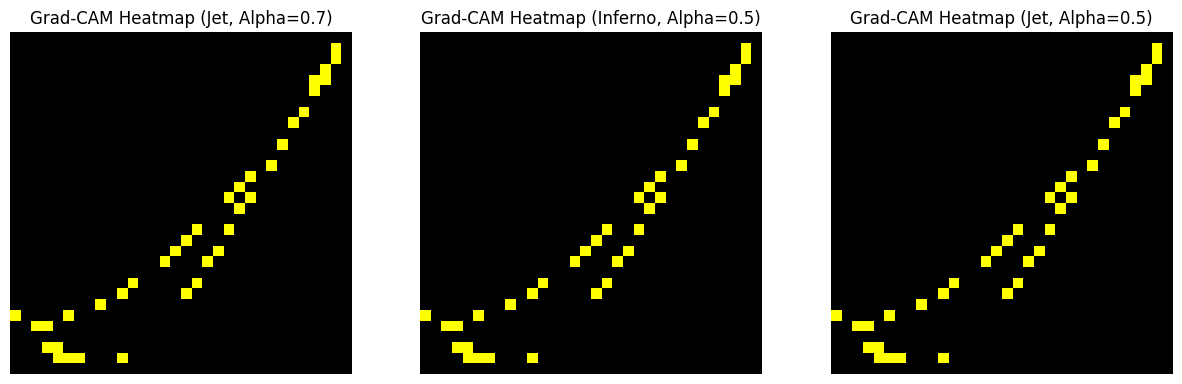

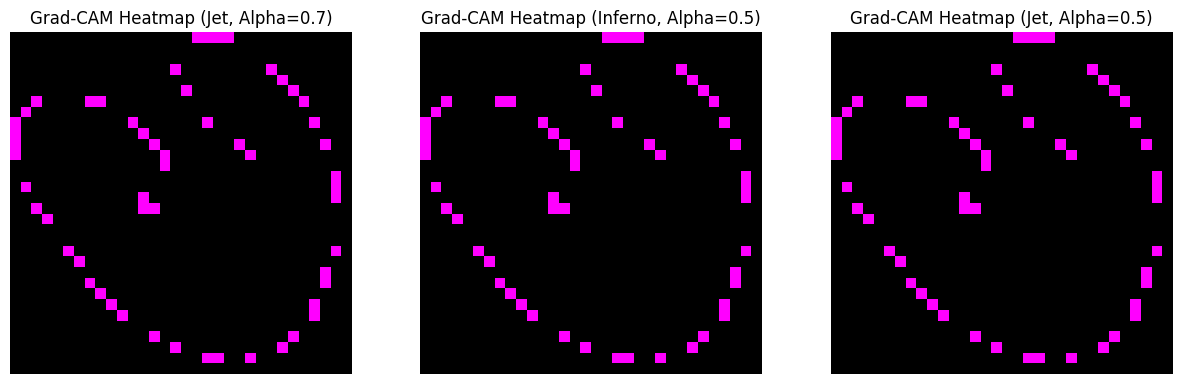

In [6]:

# This technique was used to visually inspect what the saved model after training, as it currently exists, focuses on when making predictions. 
# It helps understand whether the model is looking at the relevant features (gestures, shapes) or just picking up on colors. 
# Results here were good news! Dinuka said.
# Understanding the Overlay:
# The reason both the original image and the Grad-CAM heatmap appear to be "equal" or visually merged well is 
# because of this semi-transparent overlay. 
# The heatmap is applied on top of the original image, allowing both the image and the heatmap details to be visible. 
# This is crucial for understanding which parts of the image influenced the model's predictions.

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2  # Ensure you have OpenCV for resizing operations

# Load the model
model_path = '/Users/nely/Desktop/TinyML/Project/final_model.h5'
model = load_model(model_path)

# Image paths for testing
image_paths = [
    '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/3_405_aug0.png',
    '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/4_1448_aug2.png',
    # Add other paths if needed
]

def grad_cam(model, image, category_index, layer_name):
    """Generate a heatmap using Gradient-weighted Class Activation Mapping"""
    grad_model = tf.keras.models.Model(inputs=[model.inputs], outputs=[model.get_layer(layer_name).output, model.output])
    
    # Convert image to tensor
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        conv_outputs, predictions = grad_model(image_tensor)
        loss = predictions[:, category_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    output = conv_outputs[0].numpy()
    grads = grads.numpy()

    gate_f = output > 0
    gate_r = grads > 0
    guided_grads = gate_f * gate_r * grads

    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)

    # Processing CAM to make it visually intelligible
    cam = cv2.resize(cam, (32, 32), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    return cam

# Iterate over each image path, load the image, compute Grad-CAM, and display
for img_path in image_paths:
    original = load_img(img_path, target_size=(32, 32))
    img_array = img_to_array(original)
    img_array = np.expand_dims(img_array, axis=0)  # Shape will be (1, 32, 32, 3)

    category_index = int(img_path.split('/')[-1].split('_')[0])  # Assuming label is the first part of filename
    layer_name = 'conv2d_5'  # Last convolutional layer name or the one of interest

    heatmap = grad_cam(model, img_array, category_index, layer_name)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1  # Normalize safely

    plt.figure(figsize=(15, 5))

    # Show original image
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.imshow(heatmap, cmap='jet', alpha=0.7)  # Increase alpha for better visibility
    plt.title('Grad-CAM Heatmap (Jet, Alpha=0.7)')
    plt.axis('off')

    # Show heatmap with different colormap
    plt.subplot(1, 3, 2)
    plt.imshow(original)
    plt.imshow(heatmap, cmap='inferno', alpha=0.5)  # Change colormap to 'inferno'
    plt.title('Grad-CAM Heatmap (Inferno, Alpha=0.5)')
    plt.axis('off')

    # Show heatmap with default settings
    plt.subplot(1, 3, 3)
    plt.imshow(original)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Then overlay the heatmap
    plt.title('Grad-CAM Heatmap (Jet, Alpha=0.5)')
    plt.axis('off')

    plt.show()




In [17]:

# Load the best model to do quantization below

from tensorflow import keras

# Load the best performing model
from tensorflow import keras

# Load the final model saved after training
model = keras.models.load_model('final_model.h5')


In [20]:
# Convert and quantize the model

import tensorflow as tf
import glob
from tensorflow import keras
import os
import time

# Load the final model saved after training
model = keras.models.load_model('final_model.h5')

# Setup the converter for quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Function to create a representative dataset generator
def representative_dataset_gen():
    for filename in glob.glob('/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/*.png'):
        img = keras.preprocessing.image.load_img(filename, target_size=(32, 32))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
        img_array = tf.cast(img_array, tf.float32)  # Ensure float32 input type
        yield [img_array]

# Apply quantization to the converter
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # Ensures model uses int8 input
converter.inference_output_type = tf.int8  # Ensures model uses int8 output

# Convert the model
tflite_quant_model = converter.convert()

# Save the quantized model
quantized_model_path = 'gesture_model_quantized.tflite'
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_quant_model)

# Print the size of the quantized model
model_size = os.path.getsize(quantized_model_path)
print(f"Size of the quantized model: {model_size} bytes")

# Optional: convert bytes to kilobytes if preferred
print(f"Size of the quantized model: {model_size / 1024:.2f} KB")


INFO:tensorflow:Assets written to: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmp2aianm3k/assets


INFO:tensorflow:Assets written to: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmp2aianm3k/assets
/Applications/anaconda3/lib/python3.11/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-05-07 14:44:14.607232: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-07 14:44:14.607246: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-07 14:44:14.607351: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmp2aianm3k
2024-05-07 14:44:14.608722: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-07 14:44:14.608726: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/

Size of the quantized model: 122048 bytes
Size of the quantized model: 119.19 KB


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


In [21]:
# Printing sizes of both keras and quantized just to ensure the same size is obtained

import tensorflow as tf
import glob
from tensorflow import keras
import os
import time

# Load the final model saved after training
model = keras.models.load_model('final_model.h5')

# Print the size of the original Keras model
final_model_path = 'final_model.h5'
final_model_size = os.path.getsize(final_model_path)
print(f"Size of the final Keras model: {final_model_size} bytes")
print(f"Size of the final Keras model: {final_model_size / 1024:.2f} KB")

# Setup the converter for quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Function to create a representative dataset generator
def representative_dataset_gen():
    for filename in glob.glob('/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/*.png'):
        img = keras.preprocessing.image.load_img(filename, target_size=(32, 32))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
        img_array = tf.cast(img_array, tf.float32)  # Ensure float32 input type
        yield [img_array]

# Apply quantization to the converter
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # Ensures model uses int8 input
converter.inference_output_type = tf.int8  # Ensures model uses int8 output

# Convert the model
tflite_quant_model = converter.convert()

# Save the quantized model
quantized_model_path = 'gesture_model_quantized.tflite'
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_quant_model)

# Print the size of the quantized model
quantized_model_size = os.path.getsize(quantized_model_path)
print(f"Size of the quantized model: {quantized_model_size} bytes")
print(f"Size of the quantized model: {quantized_model_size / 1024:.2f} KB")


Size of the final Keras model: 1427280 bytes
Size of the final Keras model: 1393.83 KB
INFO:tensorflow:Assets written to: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmpapx_5sig/assets


INFO:tensorflow:Assets written to: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmpapx_5sig/assets
/Applications/anaconda3/lib/python3.11/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-05-07 14:46:13.350883: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-07 14:46:13.350914: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-07 14:46:13.351042: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/T/tmpapx_5sig
2024-05-07 14:46:13.352321: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-07 14:46:13.352326: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/h1/_gx_tjvn3cjbj451syr929dc0000gp/

Size of the quantized model: 122048 bytes
Size of the quantized model: 119.19 KB


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


In [31]:
# To TEST quantized model
import tensorflow as tf
import keras
import numpy as np
import os

# Constants for image size
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32

def predict_tflite(tflite_model_path, filename):
    # Load the quantized TFLite model
    with open(tflite_model_path, 'rb') as f:
        tflite_model = f.read()
    
    img = keras.preprocessing.image.load_img(filename, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Initialize the TFLite interpreter
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    # Quantize the input if required
    input_scale, input_zero_point = input_details["quantization"]
    if (input_scale, input_zero_point) != (0.0, 0):
        img_array = np.multiply(img_array, 1.0 / input_scale) + input_zero_point
        img_array = img_array.astype(input_details["dtype"])

    # Set the model input and invoke the interpreter
    interpreter.set_tensor(input_details["index"], img_array)
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details["index"])[0]

    # Dequantize the output if required
    output_scale, output_zero_point = output_details["quantization"]
    if (output_scale, output_zero_point) != (0.0, 0):
        pred = pred.astype(np.float32)
        pred = np.multiply((pred - output_zero_point), output_scale)

    predicted_label_index = np.argmax(pred)
    predicted_score = pred[predicted_label_index]
    return (predicted_label_index, predicted_score)

# Path to quantized model
quantized_model_path = 'gesture_model_quantized.tflite'

# Directory where test images are located
test_directory = '/Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/test_files.txt'

# Test across the directory
correct_count = 0
wrong_count = 0
discarded_count = 0

# Read test file paths from the text file
with open(test_directory, 'r') as file:
    test_file_paths = file.readlines()

# Test each image
for filepath in test_file_paths:
    # Clean the filepath by removing any leading/trailing whitespaces or newlines
    filepath = filepath.strip()
    
    # Check if the filepath is valid
    if not os.path.isfile(filepath):
        print(f"Invalid file path: {filepath}")
        continue
    
    # Proceed with prediction
    index, score = predict_tflite(quantized_model_path, filepath)
    
    # code for handling predictions goes here...
    # print the predicted label and score:
    print(f"File: {filepath}, Predicted Label Index: {index}, Predicted Score: {score}")



File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/3_405_aug0.png, Predicted Label Index: 3, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/4_1448_aug2.png, Predicted Label Index: 4, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/2_366_aug2.png, Predicted Label Index: 2, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/1_1136_aug2.png, Predicted Label Index: 1, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/4_242_aug0.png, Predicted Label Index: 4, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/4_449_aug1.png, Predicted Label Index: 4, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augmented and Rasterized/0_583_aug2.png, Predicted Label Index: 0, Predicted Score: 0.99609375
File: /Users/nely/Desktop/TinyML/Project/Augme

In [1]:
# To convert to C file
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd

# Define the TensorFlow Lite quantized model filename
QUANTIZED_TFL_MODEL_FILENAME = 'gesture_model_quantized.tflite'

# Define the output C source file name
TFL_CC_MODEL_FILENAME = 'gesture_model_data.cc'

# Convert to a C source file, i.e., a TensorFlow Lite for Microcontroller model
!xxd -i {QUANTIZED_TFL_MODEL_FILENAME} > {TFL_CC_MODEL_FILENAME}

# Update variable names
REPLACE_TEXT = QUANTIZED_TFL_MODEL_FILENAME.replace('/', '_').replace('.', '_')
!sed -i 's/{REPLACE_TEXT}/gesture_model_data/g' {TFL_CC_MODEL_FILENAME}

# Print the first 100 lines of the C source file
print("These are the first 100 lines of the C source file:")
!head -n 100 {TFL_CC_MODEL_FILENAME}

# Print the last 100 lines of the C source file
print("\nThese are the last 100 lines of the C source file:")
!tail -n 100 {TFL_CC_MODEL_FILENAME}



zsh:1: command not found: apt-get
sed: 1: "gesture_model_data.cc": extra characters at the end of g command
These are the first 100 lines of the C source file:
unsigned char gesture_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00,
  0xf8, 0xb5, 0x01, 0x00, 0x08, 0xb6, 0x01, 0x00, 0x14, 0xdc, 0x01, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,